# Worksheet 3 - Scientific Visualisation MVE080/MMG640
## Geospatial data

Names of all group members: ___Elis Åhlund, Erik Dagobert, Yixuan Pan

This is the first worksheet in the course *Scientific Visualisation*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualisations using plotnine. Once you have finished all the tasks, export this document as an HTML file and upload it in Canvas. 

The goal of these homeworks is to learn how to improve your skills in visualising your science. You solve the homeworks in groups, however annotate all the code (even the theoretical parts) with who solved each question. **Eventhough the homework is submitted as a group you will be *individually* evaluated**. Motivate your choice of graph, legend, colourmap etc below your graph in a separate cell. 

Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. 

Throughout the assignment you shall use a Python workflow.
If you are completely new to Python, take a look at [this page](pythonbasics.org).
Python can do essentially all that MATLAB can, plus more. 
In this course we shall use Python in different contexts, starting with the [Jupyter Notebook interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html). 

Matrices and arrays are handled through the NumPy module. [Learn here](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) how NumPy is different from MATLAB.

The below loads the packages required for this homework.

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 15 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

As the earth is not flat (and neither a [Möbius strip](https://en.wikipedia.org/wiki/M%C3%B6bius_strip)) when working with 2-dimensional maps we have to use a projection. Describe one scenario where it would not be suitable to use the Mercator's projection.

### Answer 1.1
_Your answer here_


#Yixuan:
The Mercator projection works by mapping the Earth onto a cylinder and then unfolding the cylinder to create a rectangular map. This method causes severe area distortion near the poles, making the Mercator projection unsuitable for world maps.

### Question 1.2

A common form of visualisation for maps is the Choropleth map (e.g slide 15 lecture 5). Briefly discuss two important aspects to consider when creating a choropleth map. 

### Answer 1.2
_Your answer here_


#Yixuan:
Choropleths tvpically lack details. Therefore, choosing the appropriate granularity and color scale is crucial.
### Question 1.3

Sometimes to avoid area problems, a more abstract map representation can be beneficial. Which abstract representation of Fig. 15.15 and Fig. 15.16 in the course book do you think work the best? Motivate!

### Answer 1.3
#Elis: It really all depends on what knowledge the viewer bestows. If the viewer knows state names better, a graph such as 15.16 is better while if the viewer is better with maps a graph such as 15.15 can make it easier to process the information.


### Question 1.4

When creating a visual, what are three sources that often cause unwilling misleading?

### Answer 1.4
#Erik:
i) Different projections of the earth onto the 2D-plane can cause different types of distortions of shapes or areas. Most commonly, the Mercator projection can mislead the reader to think that the areas near the pole are of bigger size (and therefore more significant) than the areas near the equator. 

ii) When designing a choropleth map it can be misleading if the granularity of the colored areas is uneven. This is foremost a problem when the statistic being illustrated is not a density. For example, if a very large area of a country is of low population density then a prominent color representing a high value (that is not calculated per person) will lead the reader to believe that such high values are more common in the entire data set than they actually are. 

iii) Another way we can unwillingly mislead using choropleths is if we don't choose our colours appropriately. Darker colours are typically associated to higher values when we are plotting ordered data. Also, if we are using multiple colours to plot categorical data we always need to consider colour blindness. Not adhering to these rules can mislead the reader. 

## Geospatial data  

For this part reading chapter 15 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help. You need to have **geopandas** installed for this part (it should be installed if you have used the yml-file on the webpage).

### Question 2.1

Let us take a closer look at Starbucks. Produce two visuals where i) you use dots and ii) where you use colours (here you can represent countries without Starbucks as white) to show the number of Starbucks stores in different Asian countries. 

*Hint - you can merge left and right on iso_a3*

In [3]:
# Insert code here for visual 1
#Yixuan
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asian_map=world[world.continent=="Asia"]
starbucks_data = pd.read_csv("Starbucks_data-1.csv")
asian_stores = starbucks_data[starbucks_data["iso_a3"].isin(asian_countries)]

asian_store_counts = asian_stores.groupby("iso_a3").size().reset_index(name="Count")
data_asian_stores = asian_map.merge(asian_store_counts, left_on="iso_a3", right_on="iso_a3")


p1 = (ggplot(data_asian_stores)
    + geom_map(aes(fill="Count"))
    + labs(title = "Number of Starbucks in Asian(colours)")
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank()))


p1
#data_stores = iso_a3.merge(asian_stores, left_on="SOVEREIGNT", right_on="Country")
# Remember to print the visual 

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

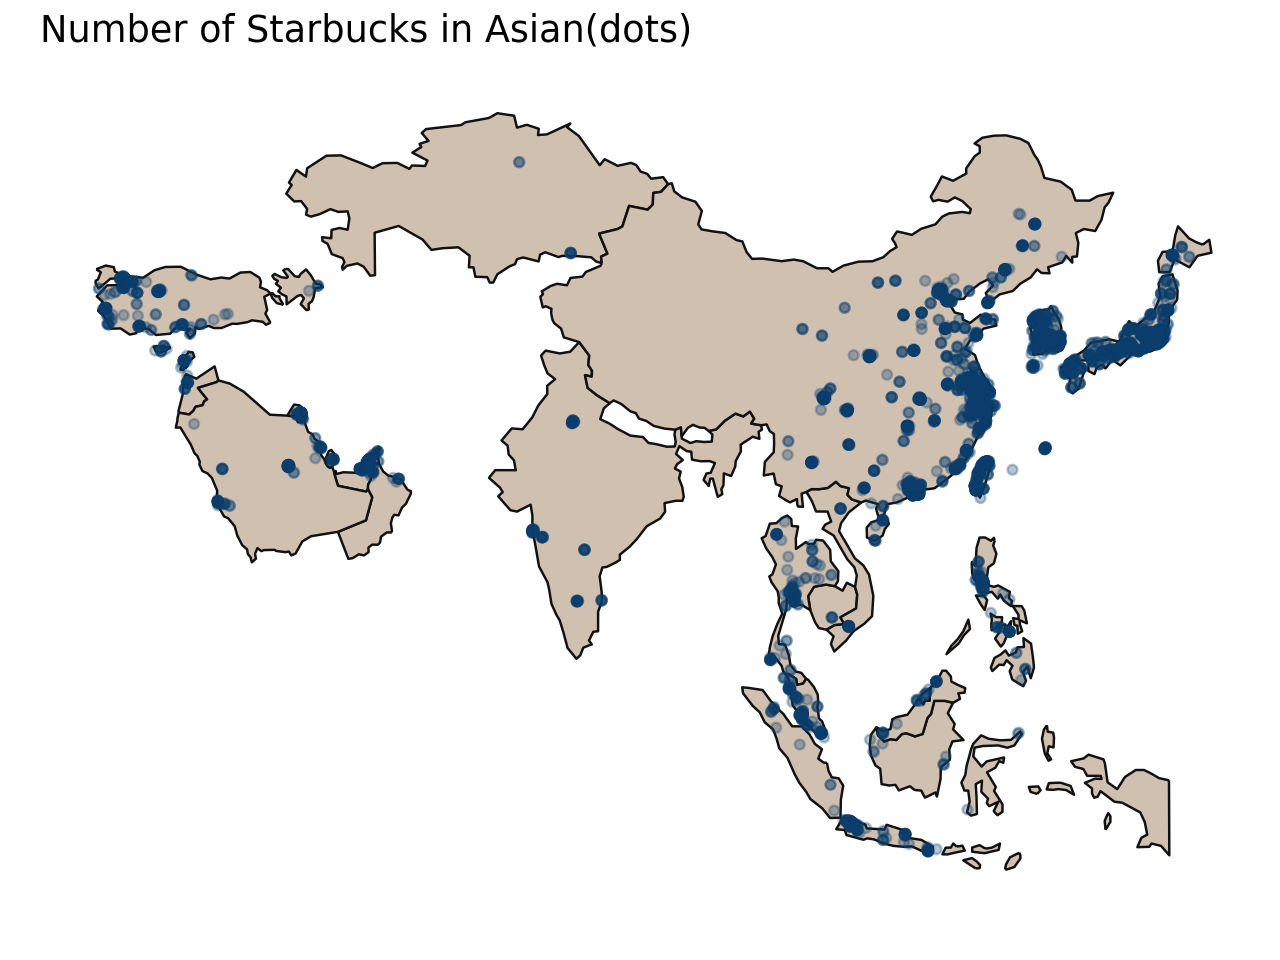

<Figure Size: (640 x 480)>

In [101]:
# Insert code here for visual 2
# Remember to print the visual 
#Yixuan
col_highlight = ["#D0C0B0", "#0A3D6B", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]
p2 = (ggplot(data_asian_stores)
    + geom_map(fill=col_highlight[0])
    + geom_point(data=asian_stores, mapping=aes(x="Longitude", y="Latitude"), color=col_highlight[1], alpha=0.3)
    + labs(title = "Number of Starbucks in Asian(dots)")
    + labs(x = "", y = "")
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank()))
p2

_Motivation of answer_


#Yixuan: Using dots allows us to see store locations quickly, but it becomes difficult to compare quantities when many dots overlap. Therefore, using colors can provide clearer information about the number of stores.

## Question 2.2

On Canvas, I have uploaded two datasets with percentage of a countries surface that is covered by forests in 1990 and 2019. Create a visual which clearly shows how forest coverage has changed between 1970 and 2019.

Motivate choice of projection!

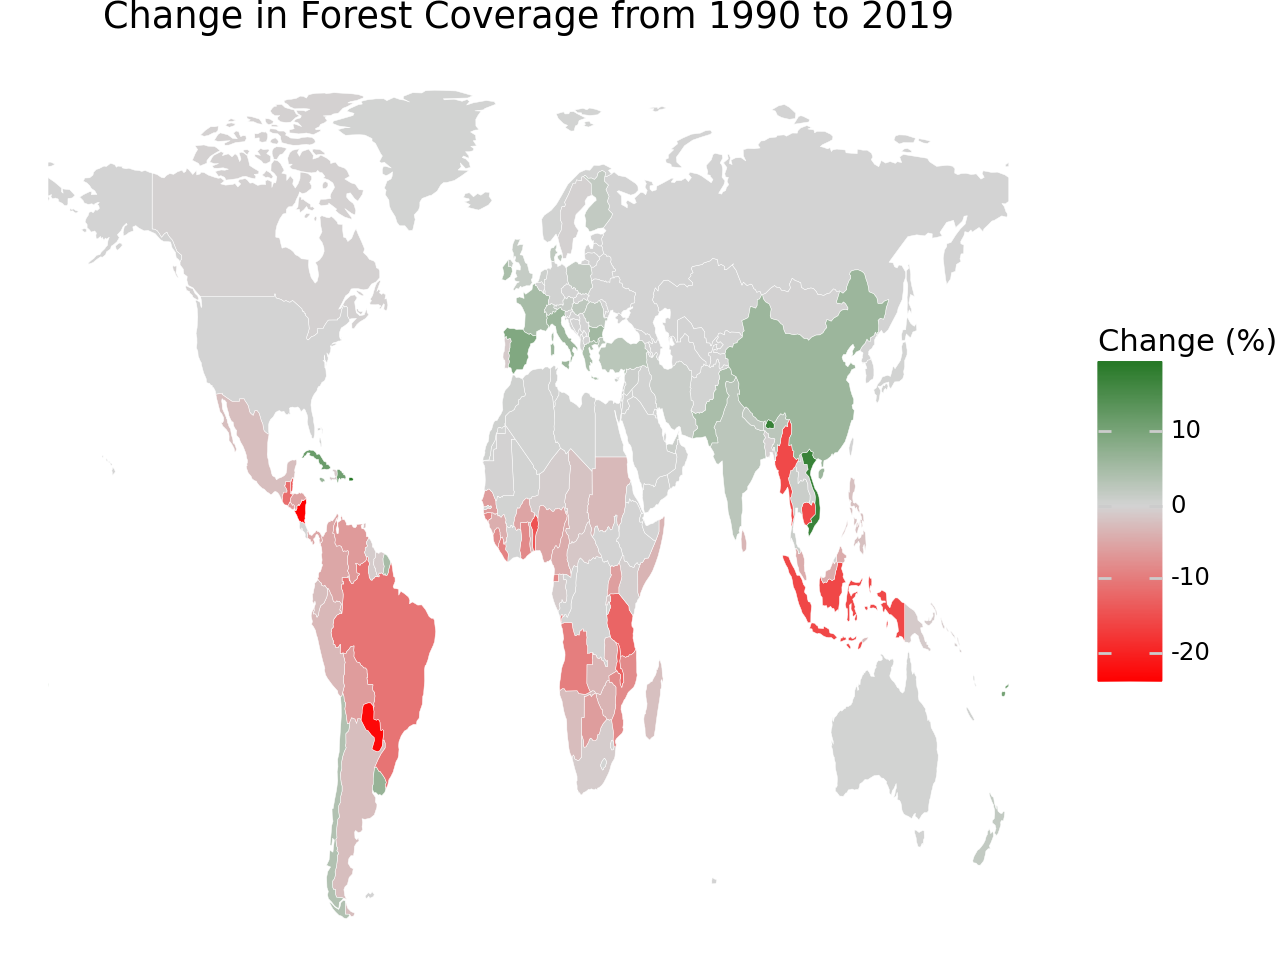

In [31]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

forest1990 = pd.read_csv("Forest_1990-1.csv")
forest2019 = pd.read_csv("Forest_2019-1.csv")

world = world.merge(forest1990, left_on="NAME_LONG", right_on="Country", how="left")
world = world.merge(forest2019, left_on="NAME_LONG", right_on="Country", how="left")

world["forest_change"] = world["2019_forest"] - world["1990_forest"]

world = world[world["NAME_LONG"] != "Antarctica"]

p = (
    ggplot(world)
    + geom_map(aes(fill="forest_change"), color="white", size=0.1)
    + scale_fill_gradient2(low="red", mid="lightgrey", high="darkgreen", midpoint=0, na_value="lightgrey")
    + labs(title="Change in Forest Coverage from 1990 to 2019",
           fill="Change (%)")
    + theme_void()
)
p

*Motivate choice of plot here* #Elis
A plot that shows the percentage differences is a good way to easily see change without having to visualise 2 plots, saving a lot of space in the meantime while also providing a clear visual difference.

## Question 2.3

On Canvas, I have uploaded a dataset of ILI activity level, a measure used to monitor the flu activity in the USA. Visualise the activity level in the USA using a choropleth visual with discrete binning of the different categories. Produce two visuals with different binning schemes, motivate which one you think works best for this data.

The code below helps you read the USA map.

In [ ]:
# Read USA map and filter away Alaska, Hawaii and non-mainland territories

map_USA = gpd.read_file("cb_2018_us_state_500k-2")
map_USA = map_USA.loc[map_USA["STUSPS"] != "VI"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "MP"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "GU"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "HI"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "AK"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "PR"]


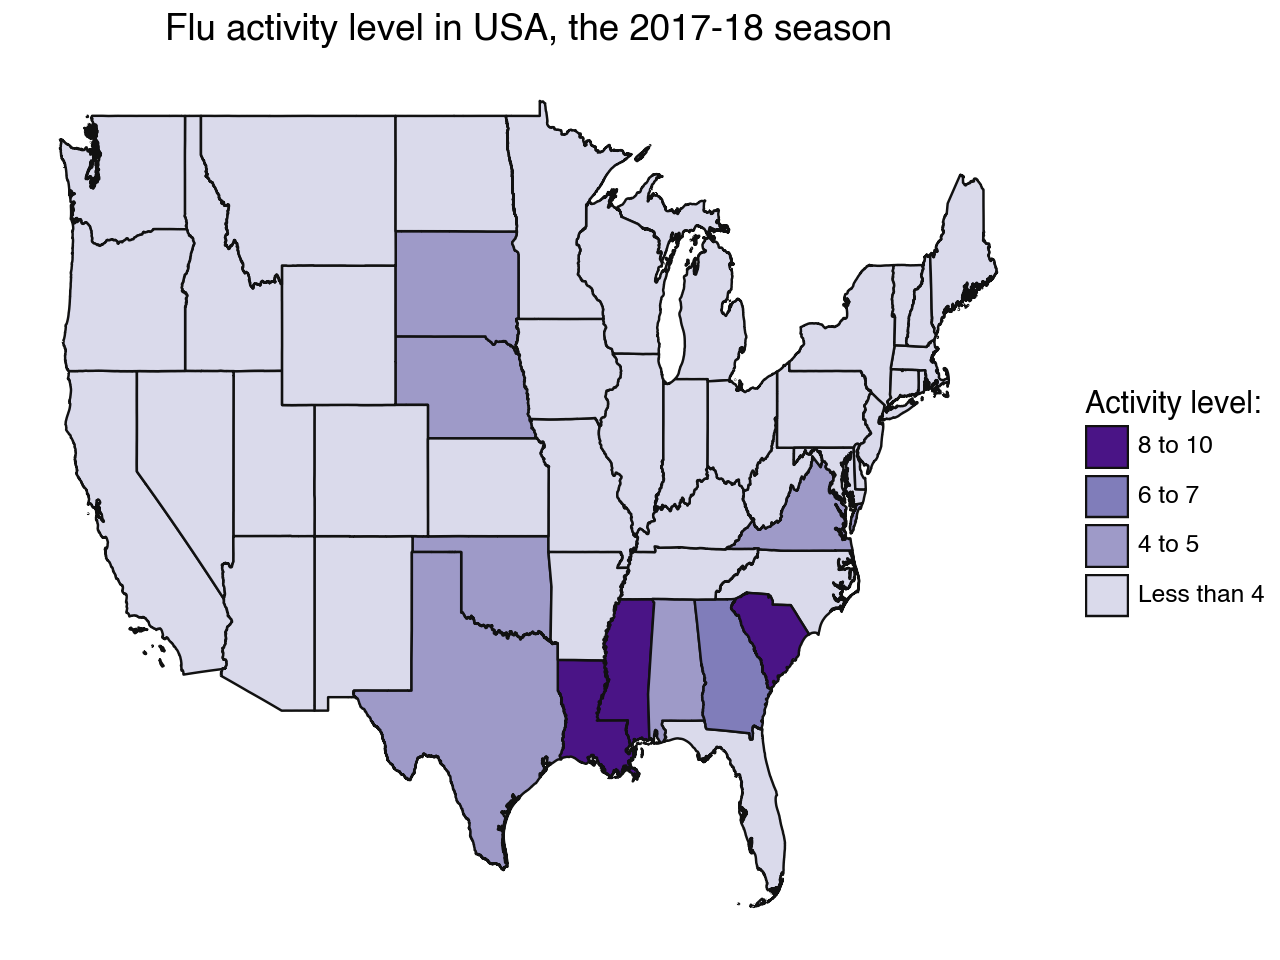

In [7]:
# Insert code here for visual 1

data_ILI = pd.read_csv("Flu_data.csv")

USA_mercator = map_USA.to_crs("EPSG:3395")
data_USA_ILI = USA_mercator.merge(data_ILI, left_on="NAME", right_on="statename")

conditions = [data_USA_ILI["activity_level"].lt(4), 
              (data_USA_ILI["activity_level"].ge(4) & data_USA_ILI["activity_level"].lt(6)), 
              (data_USA_ILI["activity_level"].ge(6) & data_USA_ILI["activity_level"].lt(8)), 
              (data_USA_ILI["activity_level"].ge(8) & data_USA_ILI["activity_level"].lt(11))]
choices = ["Less than 4", "4 to 5", "6 to 7", "8 to 10"]
data_USA_ILI["activity_jenks"] = pd.Categorical(np.select(conditions, choices, "exception"), categories=choices[::-1])


col_use = ["#dadaeb", "#9e9ac8", "#807dba", "#4a1486"]
(
    ggplot(data_USA_ILI)
        + geom_map(aes(fill="activity_jenks"))
        + labs(title = "Flu activity level in USA, the 2017-18 season")
        + scale_fill_manual(values=col_use[::-1], name = "Activity level:")
        + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank())
)

# Remember to print the visual 

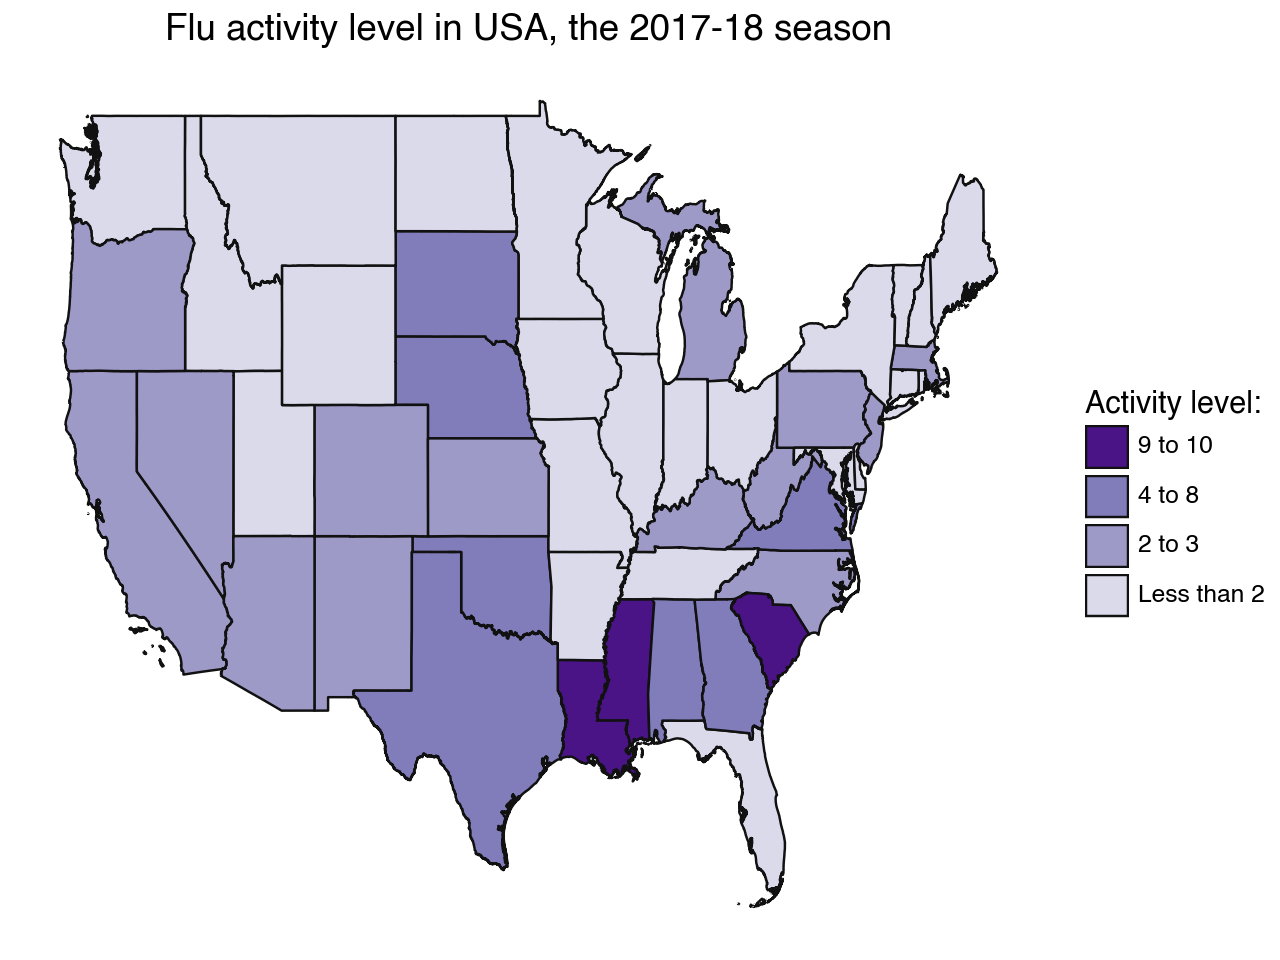

In [8]:
# Insert code here for visual 2

# Running jenk's algorithm in Matlab we get the following four bins:
# [0,1], [2, 3], [4, 8], [9, 10]

conditions = [data_USA_ILI["activity_level"].lt(2), 
              (data_USA_ILI["activity_level"].ge(2) & data_USA_ILI["activity_level"].lt(4)), 
              (data_USA_ILI["activity_level"].ge(4) & data_USA_ILI["activity_level"].lt(8)), 
              (data_USA_ILI["activity_level"].ge(9) & data_USA_ILI["activity_level"].lt(11))]
choices = ["Less than 2", "2 to 3", "4 to 8", "9 to 10"]
data_USA_ILI["activity_jenks"] = pd.Categorical(np.select(conditions, choices, "exception"), categories=choices[::-1])


col_use = ["#dadaeb", "#9e9ac8", "#807dba", "#4a1486"]
(
    ggplot(data_USA_ILI)
        + geom_map(aes(fill="activity_jenks"))
        + labs(title = "Flu activity level in USA, the 2017-18 season")
        + scale_fill_manual(values=col_use[::-1], name = "Activity level:")
        + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank())
)

# Remember to print the visual 

I decided to distribute the possible values into four bins in both visuals, this in order to better compare between them and their corresponding bin method. 

In the first visual we have close to equal size bins (since we have 10 values it is impossible to divide it evenly into four parts), bin size equal to two or three. In the second visual, Jenk's algorithm (run in Matlab) have ordered the bins. 

The visuals are quite similar. The main difference is the "less than 4"-bin which captures most states in the first visual. This makes the map less cluttered but it also makes it harder to compare differences between the states with minimal to low flu activity.